<a href="https://colab.research.google.com/github/raglandsam/Hypertension_risk_prediction/blob/main/Bpanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Loading the dataset**

Since its very large in size it takes a long amount of time.
Before that i mounted colab to drive for easier file access.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_excel('/content/drive/MyDrive/hypertension_dataset.xlsx')
df.head()



,Country,Age,BMI,Cholesterol,Systolic_BP,Diastolic_BP,Smoking_Status,Alcohol_Intake,Physical_Activity_Level,Family_History,...,Sleep_Duration,Heart_Rate,LDL,HDL,Triglycerides,Glucose,Gender,Education_Level,Employment_Status,Hypertension
0,UK,58,29.5,230,160,79,Never,27.9,Low,Yes,...,6.1,80,100,75,72,179,Female,Primary,Unemployed,High
1,Spain,34,36.2,201,120,84,Never,27.5,High,Yes,...,9.8,56,77,47,90,113,Male,Secondary,Unemployed,High
2,Indonesia,73,18.2,173,156,60,Current,1.8,High,Yes,...,5.2,75,162,56,81,101,Male,Primary,Employed,Low
3,Canada,60,20.3,183,122,94,Never,11.6,Moderate,Yes,...,7.5,71,164,93,94,199,Female,Secondary,Retired,High
4,France,73,21.8,296,91,97,Never,29.1,Moderate,Yes,...,5.0,52,108,74,226,157,Female,Primary,Employed,High


##Preprocessing


In [ ]:


cols = pd.read_excel('/content/drive/MyDrive/hypertension_dataset.xlsx', nrows=0).columns.tolist()
print(cols)


['Country', 'Age', 'BMI', 'Cholesterol', 'Systolic_BP', 'Diastolic_BP', 'Smoking_Status', 'Alcohol_Intake', 'Physical_Activity_Level', 'Family_History', 'Diabetes', 'Stress_Level', 'Salt_Intake', 'Sleep_Duration', 'Heart_Rate', 'LDL', 'HDL', 'Triglycerides', 'Glucose', 'Gender', 'Education_Level', 'Employment_Status', 'Hypertension']


###Droping unnecessary columns

In [ ]:
df.drop(columns=['Education_Level'], inplace=True)


###Check for null values

no null values present in the dataset by the way.

In [ ]:
print(df.dtypes)
df.isnull().sum()

Country                     object
Age                          int64
BMI                        float64
Cholesterol                  int64
Systolic_BP                  int64
Diastolic_BP                 int64
Smoking_Status              object
Alcohol_Intake             float64
Physical_Activity_Level     object
Family_History              object
Diabetes                    object
Stress_Level                 int64
Salt_Intake                float64
Sleep_Duration             float64
Heart_Rate                   int64
LDL                          int64
HDL                          int64
Triglycerides                int64
Glucose                      int64
Gender                      object
Employment_Status           object
Hypertension                object
dtype: object


,0
Country,0
Age,0
BMI,0
Cholesterol,0
Systolic_BP,0
Diastolic_BP,0
Smoking_Status,0
Alcohol_Intake,0
Physical_Activity_Level,0
Family_History,0


###check for duplicates and outliers

We're safe

Duplicates: 0


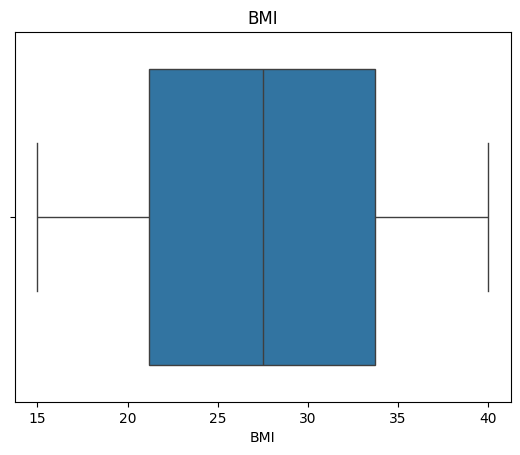

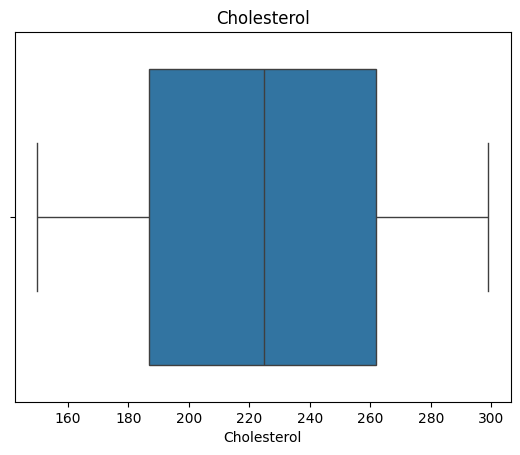

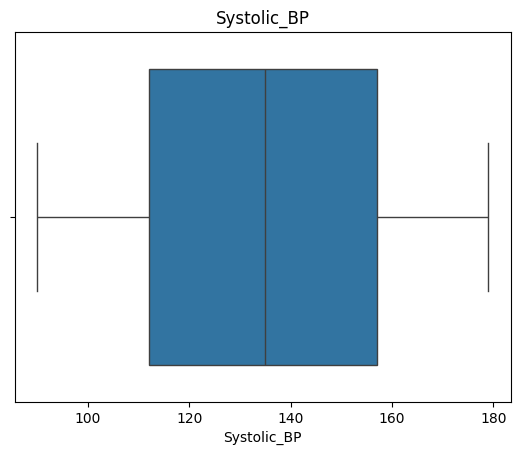

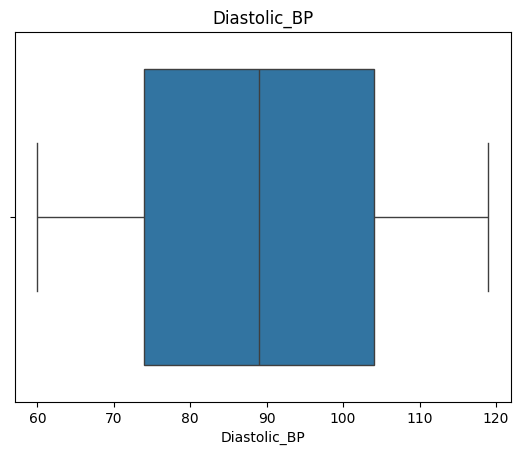

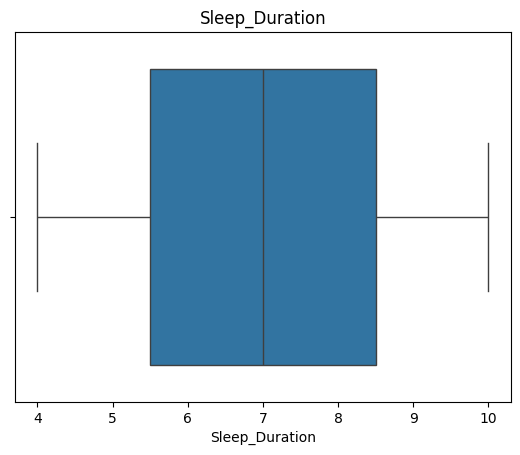

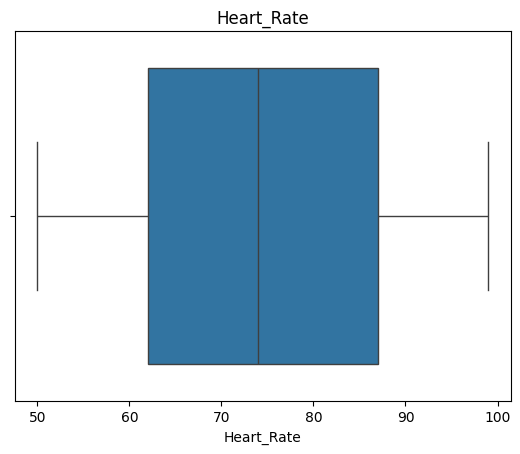

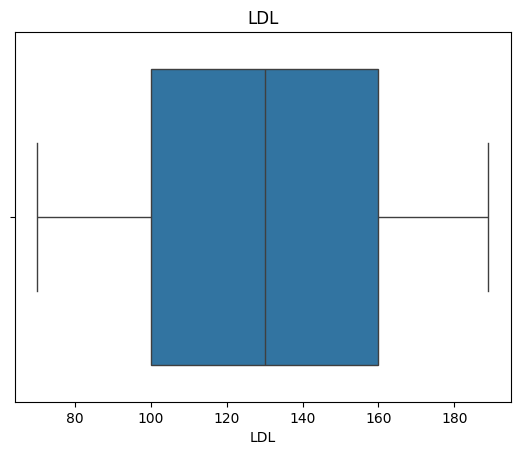

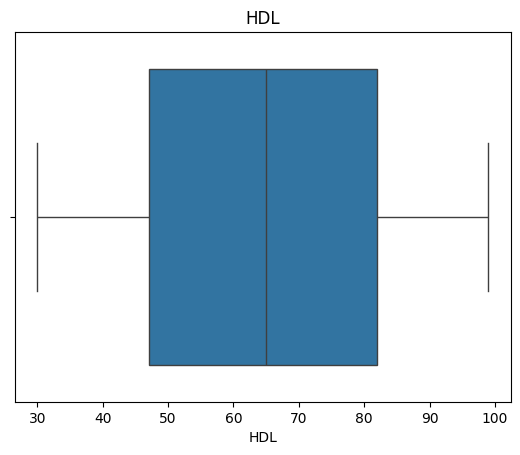

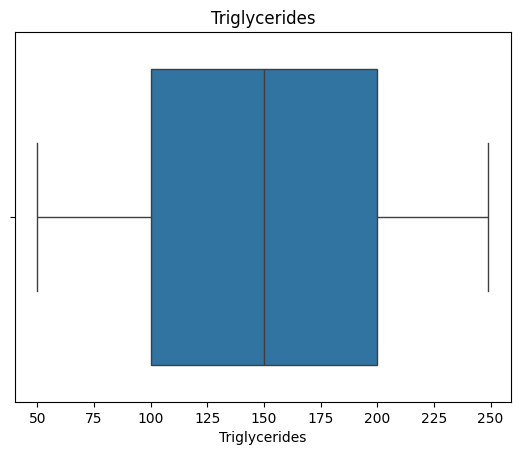

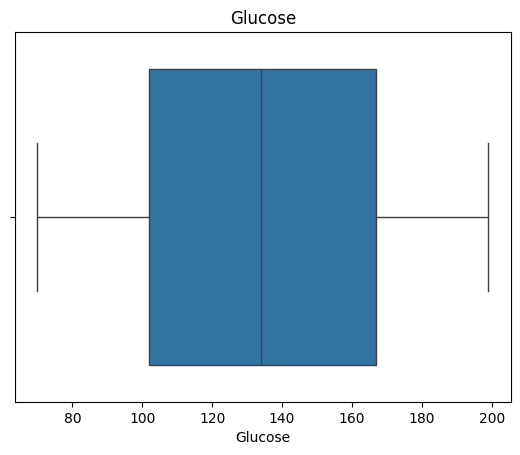

In [ ]:
print("Duplicates:", df.duplicated().sum())
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ['BMI', 'Cholesterol', 'Systolic_BP', 'Diastolic_BP',
                'Sleep_Duration', 'Heart_Rate', 'LDL', 'HDL',
                'Triglycerides', 'Glucose']

for col in numeric_cols:
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()



###Checking for inconsistent strings


In [ ]:
for col in df.select_dtypes(include='object').columns:
    print(col, df[col].unique())
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip().str.lower().str.capitalize()



Country ['UK' 'Spain' 'Indonesia' 'Canada' 'France' 'South Korea' 'Brazil' 'China'
 'India' 'Italy' 'Germany' 'USA' 'Argentina' 'Australia' 'Saudi Arabia'
 'Russia' 'Japan' 'Turkey' 'Mexico' 'South Africa']
Smoking_Status ['Never' 'Current' 'Former']
Physical_Activity_Level ['Low' 'High' 'Moderate']
Family_History ['Yes' 'No']
Diabetes ['Yes' 'No']
Gender ['Female' 'Male']
Employment_Status ['Unemployed' 'Employed' 'Retired']
Hypertension ['High' 'Low']


###Encoding numerical data.

In [ ]:
binary_map = {'Yes': 1, 'No': 0, 'Male': 0, 'Female': 1, 'Low': 0, 'High': 1}

df['Family_History'] = df['Family_History'].map(binary_map)
df['Diabetes'] = df['Diabetes'].map(binary_map)
df['Gender'] = df['Gender'].map(binary_map)
df['Hypertension'] = df['Hypertension'].map(binary_map)

smoking_map = {'Never': 0, 'Former': 1, 'Current': 2}
activity_map = {'Low': 0, 'Moderate': 1, 'High': 2}
employement_map = {'Employed': 1, 'Unemployed': 0,'Retired':2}

df['Smoking_Status'] = df['Smoking_Status'].map(smoking_map)
df['Physical_Activity_Level'] = df['Physical_Activity_Level'].map(activity_map)
df['Employment_Status'] = df['Employment_Status'].map(employement_map)


print(df.dtypes)
print(df.head())


Country                     object
Age                          int64
BMI                        float64
Cholesterol                  int64
Systolic_BP                  int64
Diastolic_BP                 int64
Smoking_Status               int64
Alcohol_Intake             float64
Physical_Activity_Level      int64
Family_History               int64
Diabetes                     int64
Stress_Level                 int64
Salt_Intake                float64
Sleep_Duration             float64
Heart_Rate                   int64
LDL                          int64
HDL                          int64
Triglycerides                int64
Glucose                      int64
Gender                       int64
Employment_Status            int64
Hypertension                 int64
dtype: object
     Country  Age   BMI  Cholesterol  Systolic_BP  Diastolic_BP  \
0         Uk   58  29.5          230          160            79   
1      Spain   34  36.2          201          120            84   
2  Indonesia   

In [ ]:
from google.colab import files

# Save the DataFrame to a CSV file
"""df.to_csv('HyperTensionedited.csv', index=False)"""

# Save as XLSX
df.to_excel('HyperTensionEdited.xlsx', index=False)


# Download the file to your local machine
"""files.download('HyperTensionedited.csv')"""
files.download('HyperTensioneditedexcel.xlsx')


FileNotFoundError: Cannot find file: HyperTensioneditedexcel.xlsx

###Final check of the dataframe

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/HyperTensionedited.csv'
import pandas as pd

df= pd.read_csv(file_path)
df.head()


,Country,Age,BMI,Cholesterol,Systolic_BP,Diastolic_BP,Smoking_Status,Alcohol_Intake,Physical_Activity_Level,Family_History,...,Salt_Intake,Sleep_Duration,Heart_Rate,LDL,HDL,Triglycerides,Glucose,Gender,Hypertension,Employment_Status
0,Uk,58,29.5,230,160,79,0,27.9,0,1,...,14.7,6.1,80,100,75,72,179,1,1,0
1,Spain,34,36.2,201,120,84,0,27.5,2,1,...,10.8,9.8,56,77,47,90,113,0,1,0
2,Indonesia,73,18.2,173,156,60,2,1.8,2,1,...,6.5,5.2,75,162,56,81,101,0,0,1
3,Canada,60,20.3,183,122,94,0,11.6,1,1,...,4.0,7.5,71,164,93,94,199,1,1,0
4,France,73,21.8,296,91,97,0,29.1,1,1,...,8.4,5.0,52,108,74,226,157,1,1,1


In [ ]:
print(df.describe())
print(df.info())
df.dtypes


                 Age            BMI    Cholesterol    Systolic_BP  \
count  174982.000000  174982.000000  174982.000000  174982.000000   
mean       53.493319      27.494672     224.539335     134.505229   
std        20.786353       7.213866      43.361589      26.019268   
min        18.000000      15.000000     150.000000      90.000000   
25%        36.000000      21.200000     187.000000     112.000000   
50%        54.000000      27.500000     225.000000     135.000000   
75%        71.000000      33.700000     262.000000     157.000000   
max        89.000000      40.000000     299.000000     179.000000   

        Diastolic_BP  Smoking_Status  Alcohol_Intake  Physical_Activity_Level  \
count  174982.000000    174982.00000   174982.000000            174982.000000   
mean       89.450315         1.00388       14.991069                 1.000972   
std        17.310789         0.81584        8.652624                 0.816846   
min        60.000000         0.00000        0.000000  

,0
Country,object
Age,int64
BMI,float64
Cholesterol,int64
Systolic_BP,int64
Diastolic_BP,int64
Smoking_Status,int64
Alcohol_Intake,float64
Physical_Activity_Level,int64
Family_History,int64


###load edited dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

# This is the path to your CSV in Drive
file_path = '/content/drive/MyDrive/Colab Notebooks/HyperTensionedited.csv'

# Load that CSV
df = pd.read_csv(file_path)

print("✅ CSV loaded from Drive")
print(df.head())


Mounted at /content/drive
✅ CSV loaded from Drive
     Country  Age   BMI  Cholesterol  Systolic_BP  Diastolic_BP  \
0         Uk   58  29.5          230          160            79   
1      Spain   34  36.2          201          120            84   
2  Indonesia   73  18.2          173          156            60   
3     Canada   60  20.3          183          122            94   
4     France   73  21.8          296           91            97   

   Smoking_Status  Alcohol_Intake  Physical_Activity_Level  Family_History  \
0               0            27.9                        0               1   
1               0            27.5                        2               1   
2               2             1.8                        2               1   
3               0            11.6                        1               1   
4               0            29.1                        1               1   

   ...  Salt_Intake  Sleep_Duration  Heart_Rate  LDL  HDL  Triglycerides  \
0 

##1)Pre -Classification Prep

###correlation matrices

####Correlation between all attributes

In [ ]:
print(df['Smoking_Status'].value_counts())
df['Hypertension'].value_counts()


Smoking_Status
2    58574
1    58513
0    57895
Name: count, dtype: int64


,count
Hypertension,
1,125781
0,49201


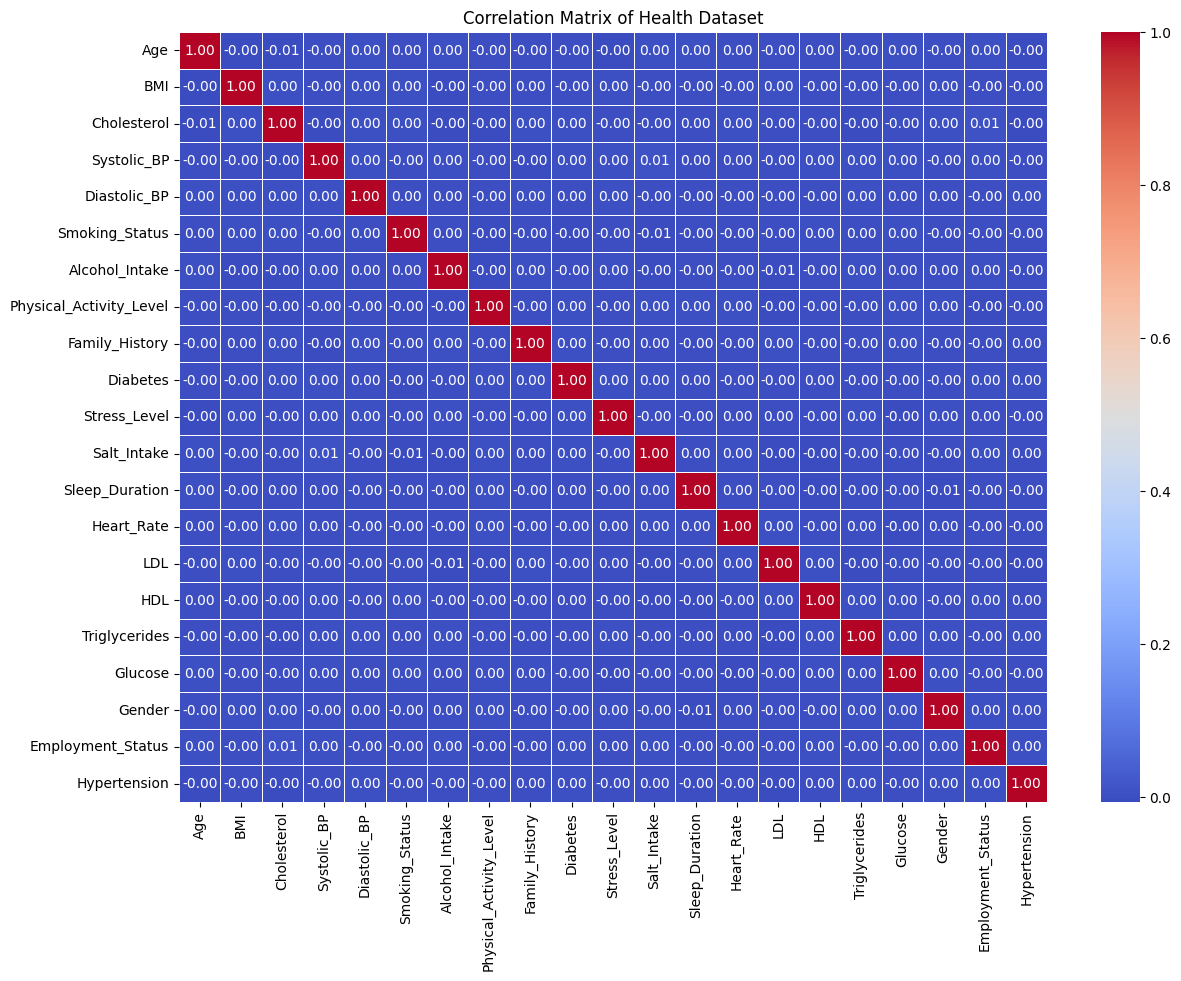

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: if you want to focus only on certain columns
# columns_of_interest = ['Systolic_BP', 'Diastolic_BP', 'BMI', 'Cholesterol', 'Stress_Level', 'Sleep_Duration', 'Physical_Activity', 'Smoking_Status', 'Alcohol_Intake', 'Hypertension']
# corr_matrix = df[columns_of_interest].corr()

# Full correlation matrix for numeric fields
corr_matrix = df.corr(numeric_only=True)

# Plotting the heatmap
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Health Dataset")
plt.show()


####correlation matrix only for non enocoded columns

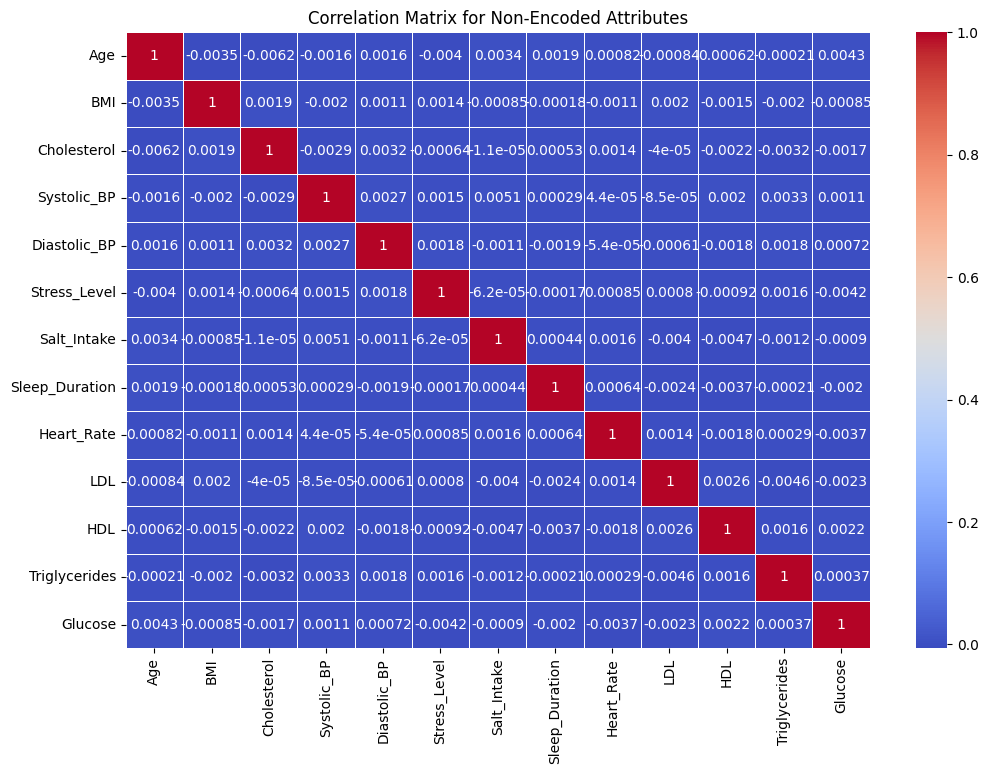

In [ ]:
# for non-encoded/numeric columns
non_encoded_columns = ['Age', 'BMI', 'Cholesterol', 'Systolic_BP', 'Diastolic_BP', 'Stress_Level',
                       'Salt_Intake', 'Sleep_Duration', 'Heart_Rate', 'LDL', 'HDL', 'Triglycerides', 'Glucose']

# Subset the dataframe to these columns
df_non_encoded = df[non_encoded_columns]


corr_matrix_non_encoded = df_non_encoded.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix_non_encoded, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Non-Encoded Attributes')
plt.show()


###outlier check

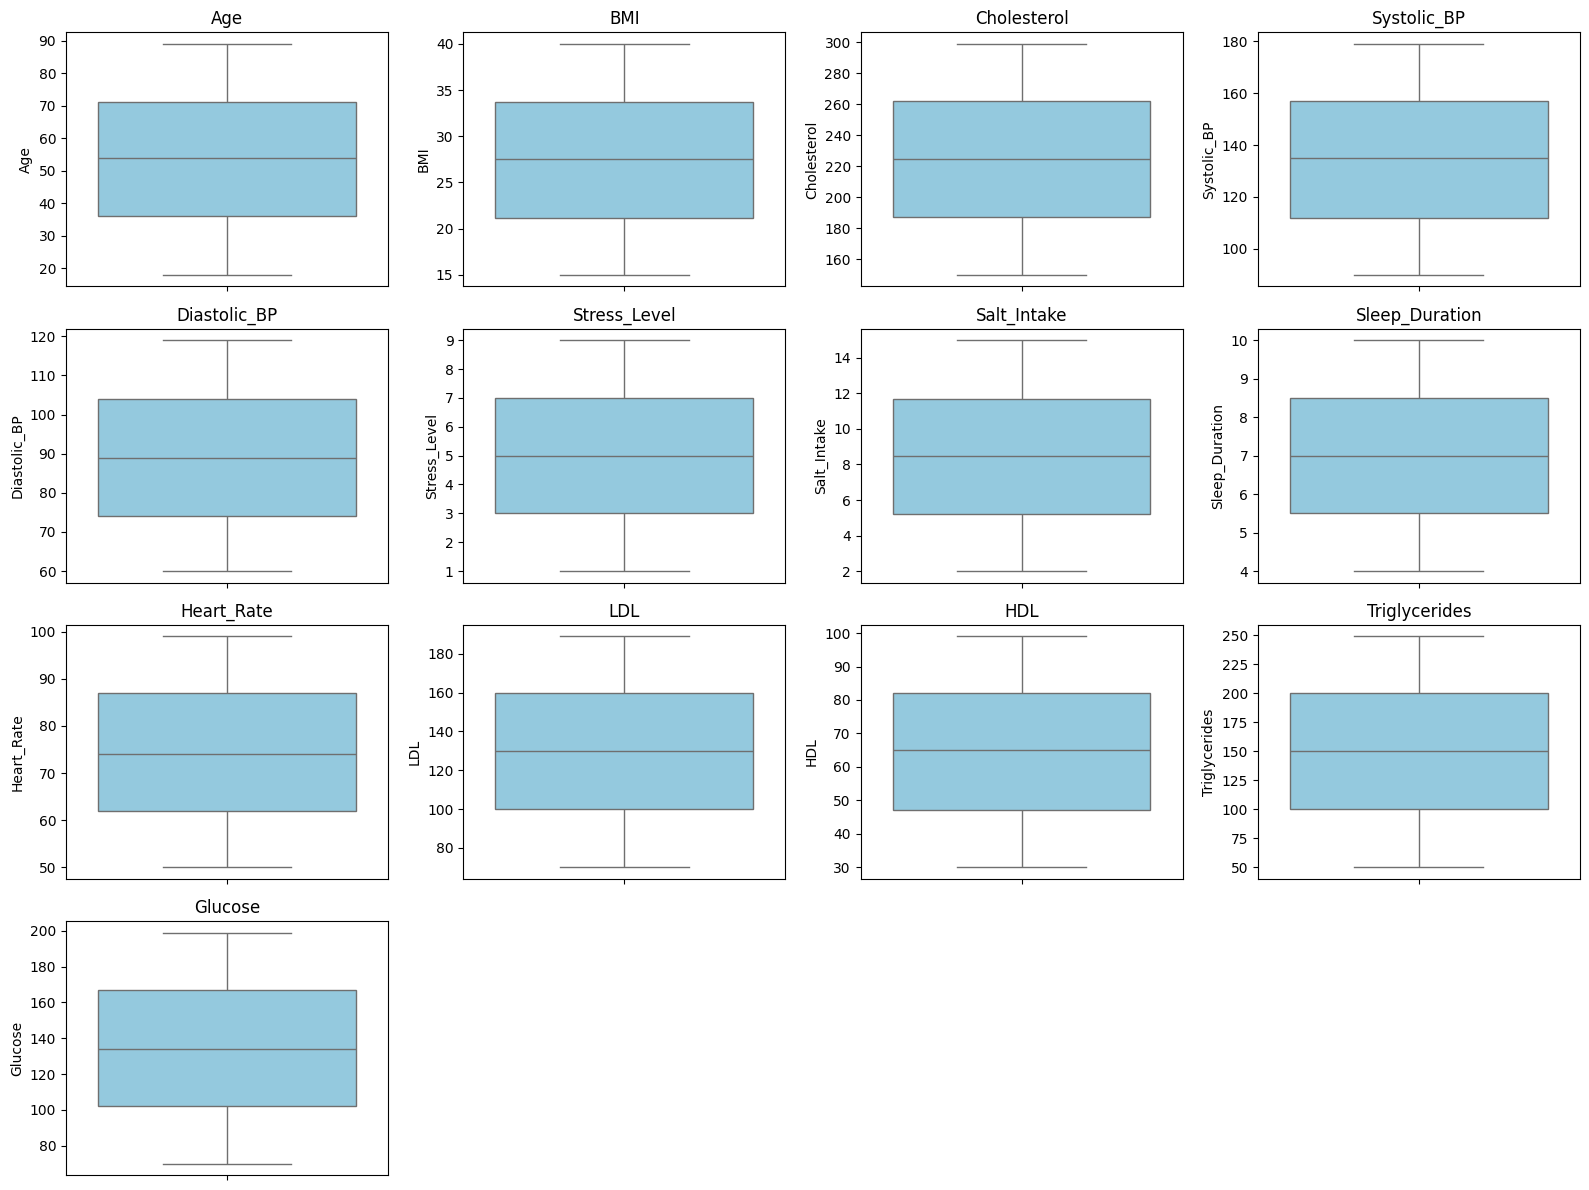

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric columns (excluding encoded categorical ones)
numeric_cols = ['Age', 'BMI', 'Cholesterol', 'Systolic_BP', 'Diastolic_BP',
                'Stress_Level', 'Salt_Intake', 'Sleep_Duration', 'Heart_Rate',
                'LDL', 'HDL', 'Triglycerides', 'Glucose']

plt.figure(figsize=(16, 12))

# Loop through those non-encoded columns and create subplots
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(col)

plt.tight_layout()
plt.show()


###Distributions check for all non encoded columns

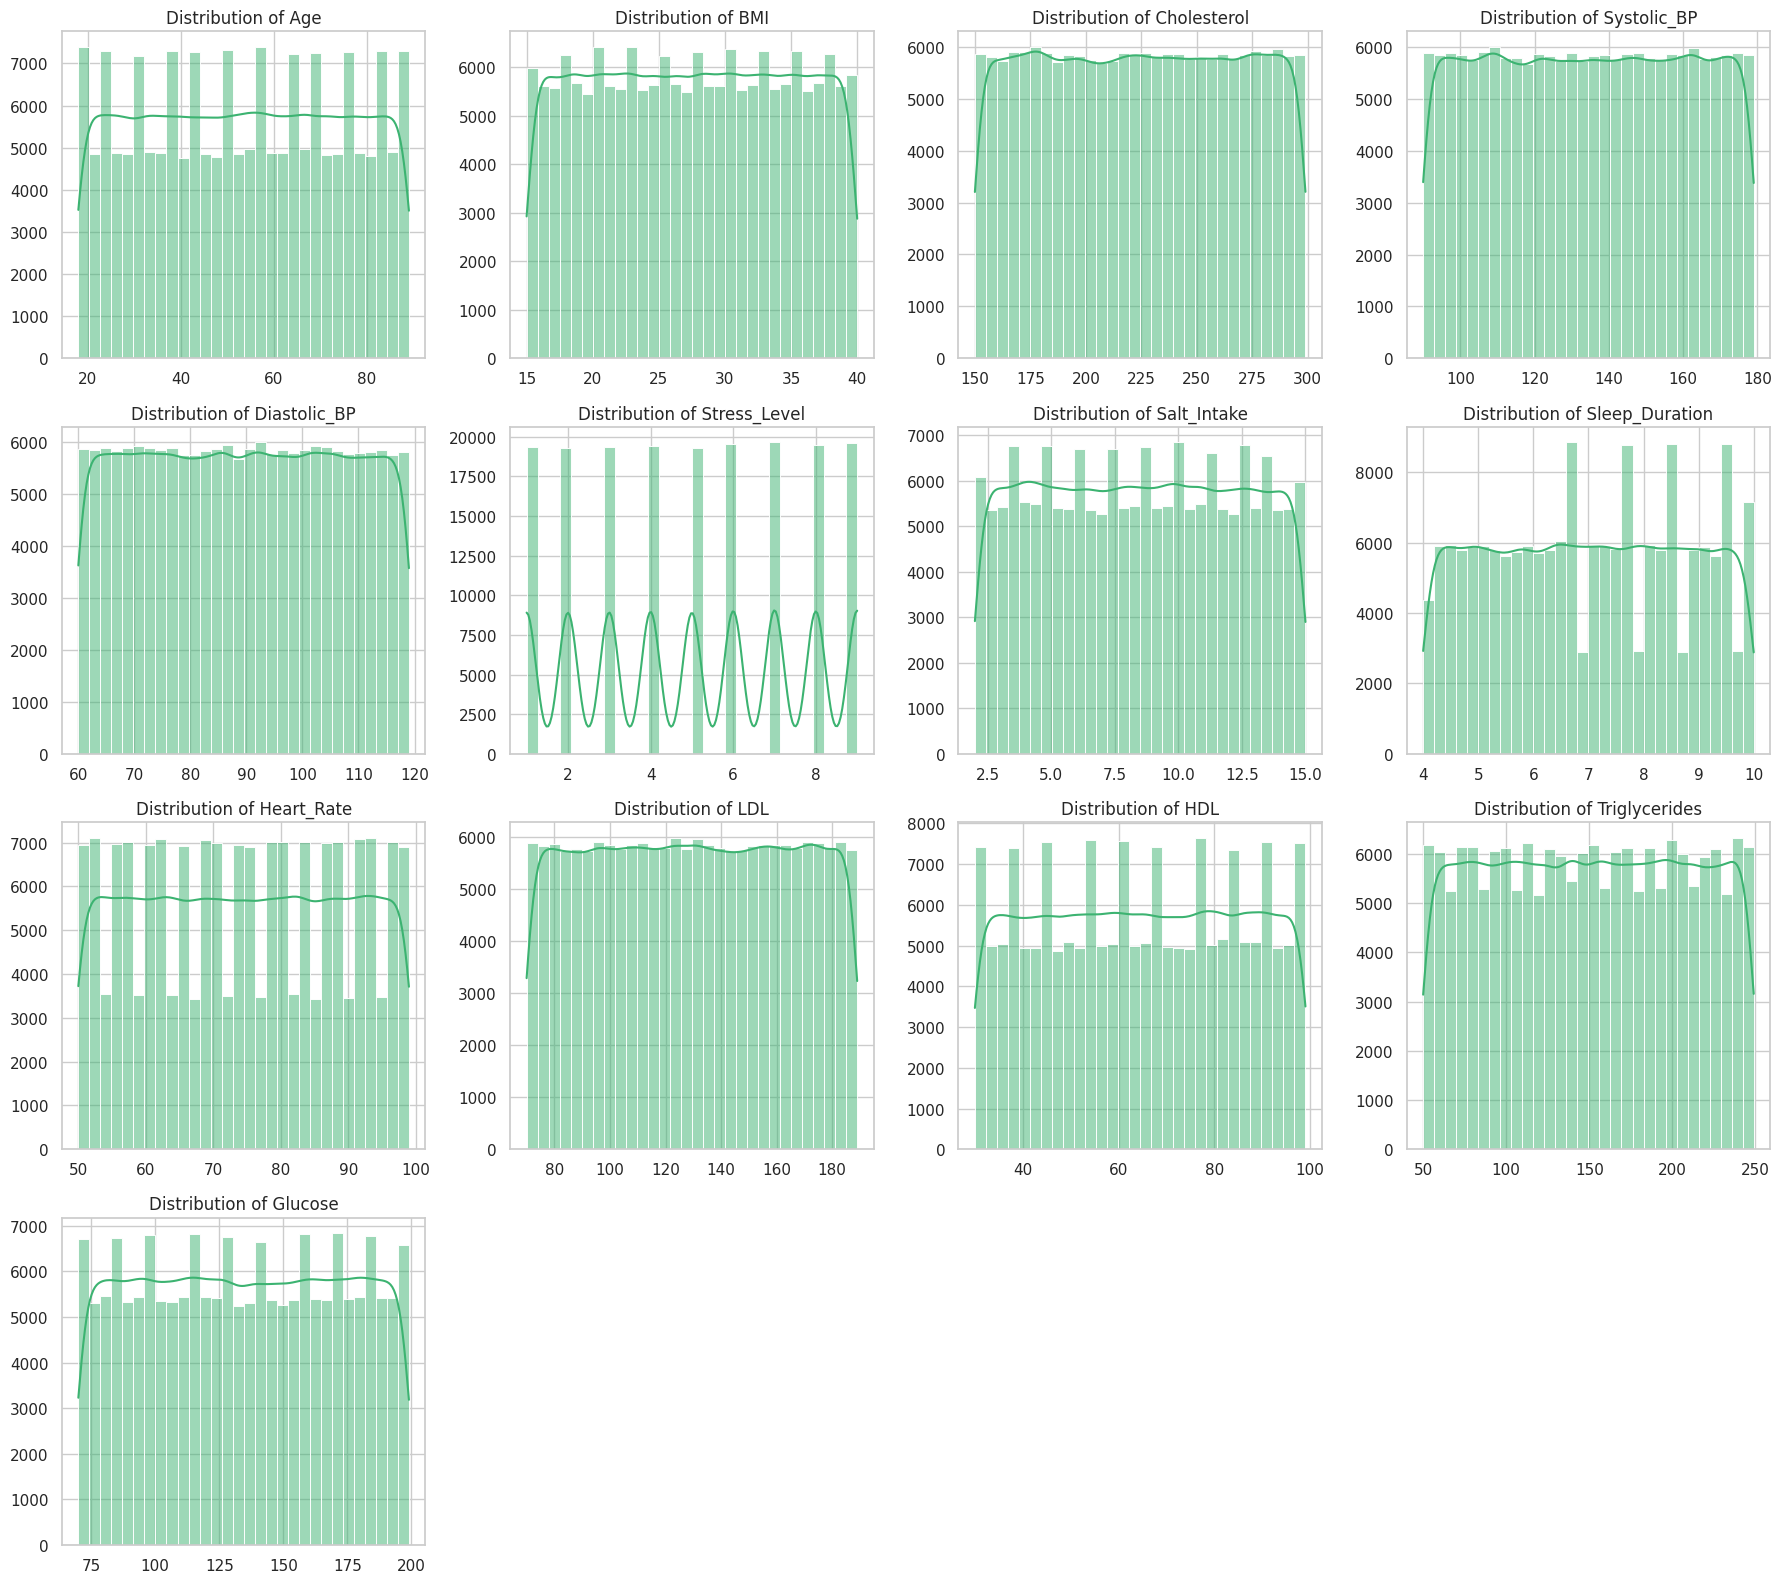

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reuse the same list of numeric columns
numeric_cols = ['Age', 'BMI', 'Cholesterol', 'Systolic_BP', 'Diastolic_BP',
                'Stress_Level', 'Salt_Intake', 'Sleep_Duration', 'Heart_Rate',
                'LDL', 'HDL', 'Triglycerides', 'Glucose']

# Set plot style
sns.set(style='whitegrid')
plt.figure(figsize=(18, 16))

# Loop through and plot each feature
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[col], kde=True, bins=30, color='mediumseagreen')
    plt.title(f'Distribution of {col}')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()


###Compare Feature Distributions by Hypertension

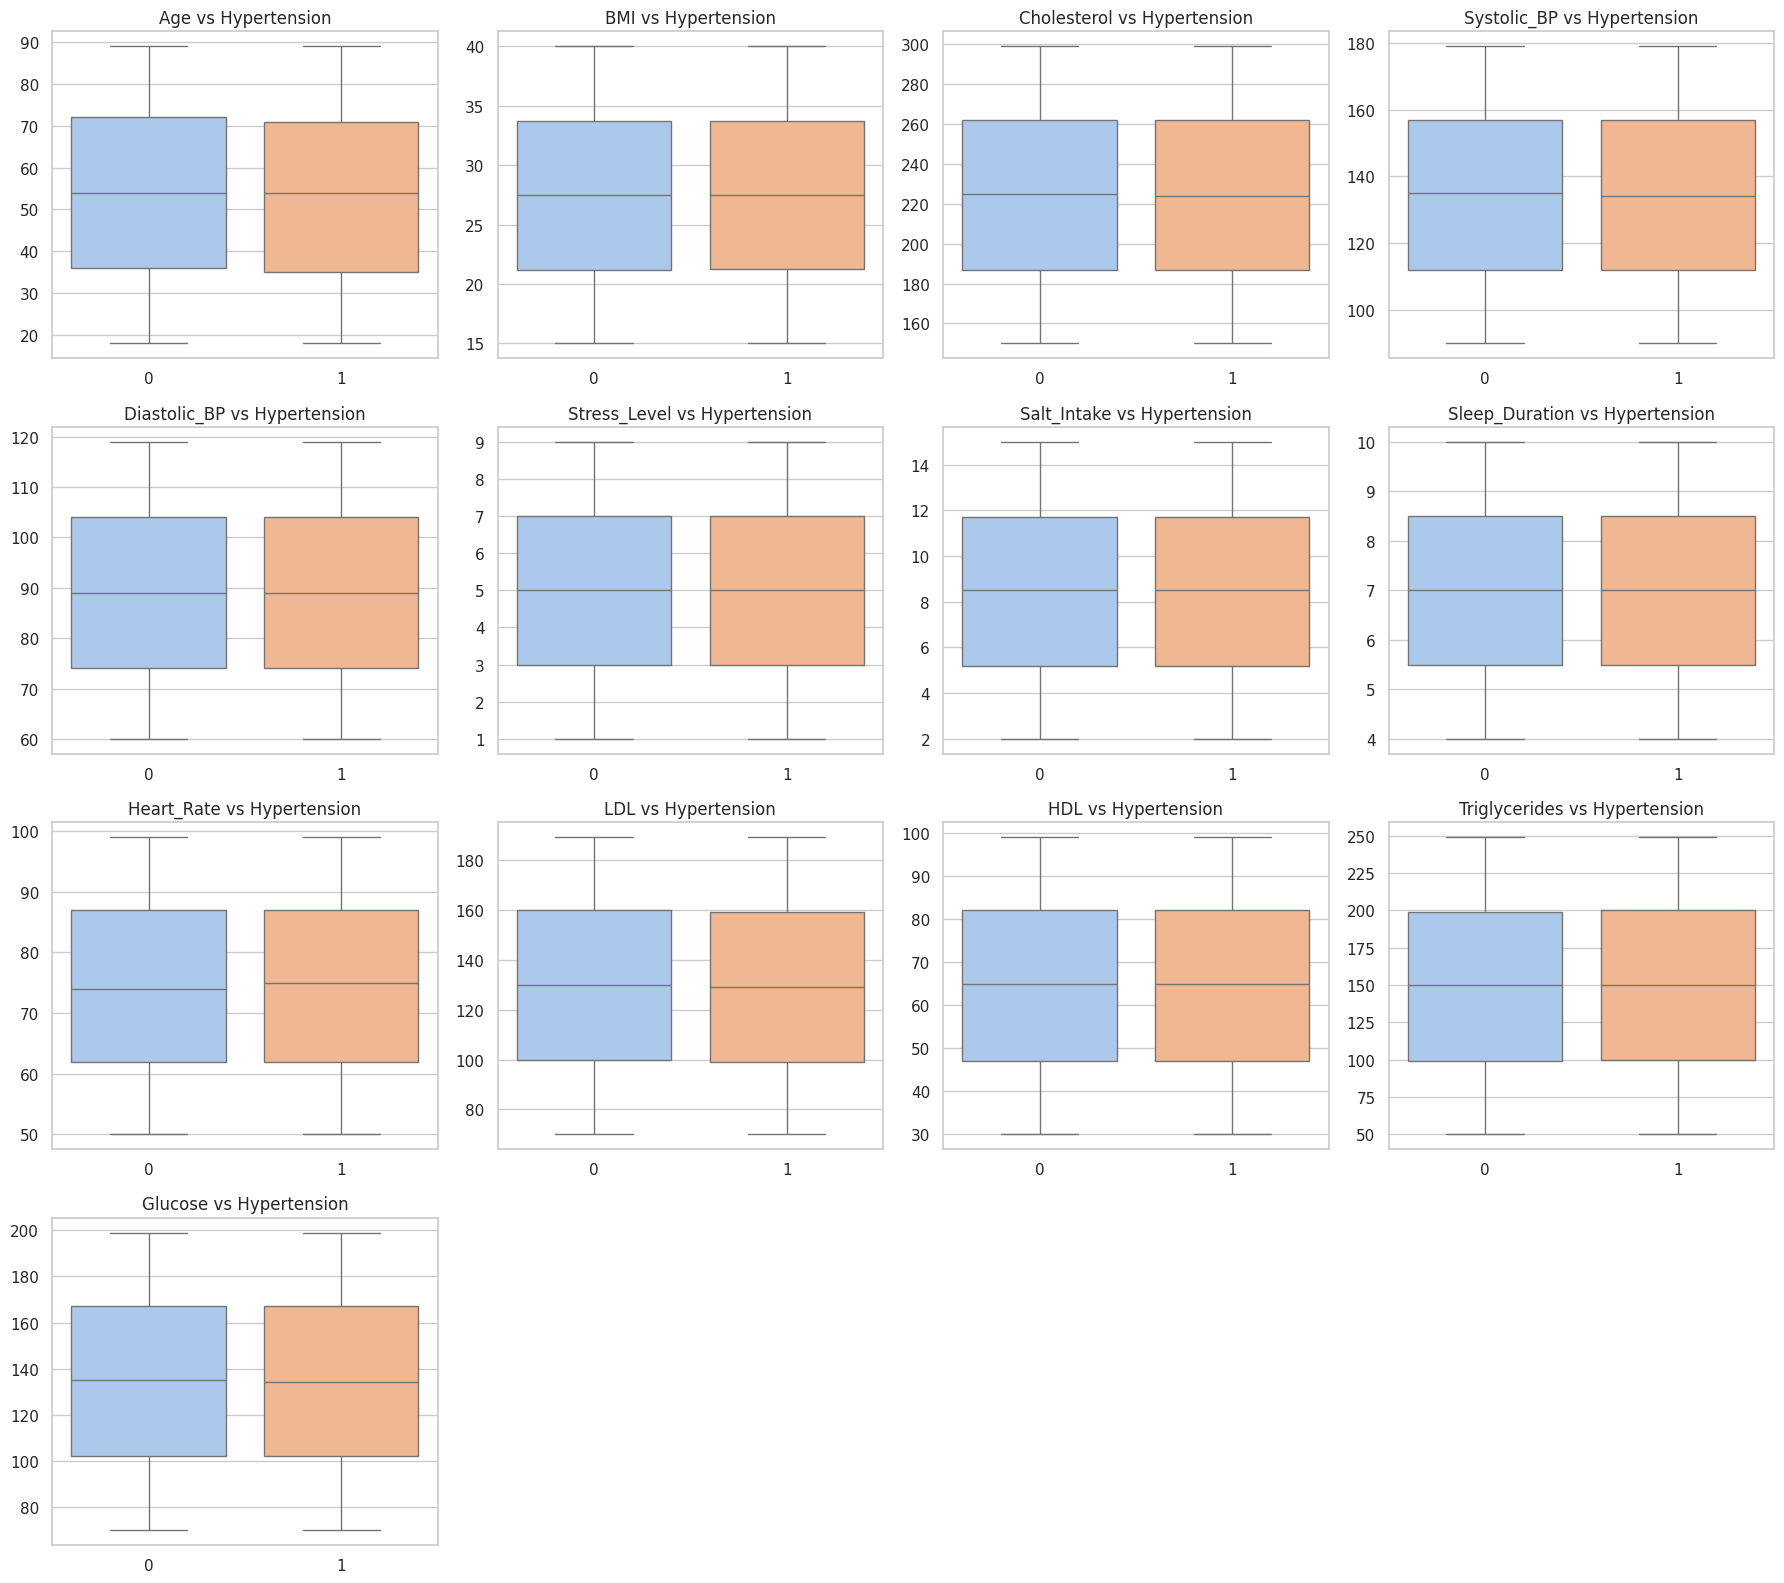

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style='whitegrid')
plt.figure(figsize=(18, 16))

# List of numeric features
numeric_cols = ['Age', 'BMI', 'Cholesterol', 'Systolic_BP', 'Diastolic_BP',
                'Stress_Level', 'Salt_Intake', 'Sleep_Duration', 'Heart_Rate',
                'LDL', 'HDL', 'Triglycerides', 'Glucose']

# Plot with hue to fix the palette warning(i got a palette warning !)
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data=df, x='Hypertension', y=col, hue='Hypertension', palette='pastel', legend=False)
    plt.title(f'{col} vs Hypertension')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()


###Pearson correlation test for checking strong or weak correaltions

In [ ]:
from scipy.stats import pointbiserialr

# List of continuous features
continuous_features = ['Age', 'BMI', 'Cholesterol', 'Systolic_BP', 'Diastolic_BP',
                       'Salt_Intake', 'Sleep_Duration', 'Heart_Rate', 'LDL',
                       'HDL', 'Triglycerides', 'Glucose', 'Stress_Level']

# Point-biserial correlation results
pbc_results = {}

for feature in continuous_features:
    r, p_value = pointbiserialr(df['Hypertension'], df[feature])
    pbc_results[feature] = {'Correlation': r, 'p-value': p_value}

# Convert to DataFrame
pbc_df = pd.DataFrame(pbc_results).T.sort_values(by='Correlation', ascending=False)

# result
pbc_df


,Correlation,p-value
Triglycerides,0.002586,0.279361
Diastolic_BP,0.002081,0.384020
Salt_Intake,0.000682,0.775526
HDL,0.000576,0.809713
Heart_Rate,-0.000048,0.984042
Glucose,-0.000128,0.957319
Sleep_Duration,-0.000155,0.948391
Stress_Level,-0.000469,0.844340
BMI,-0.001015,0.671231
Systolic_BP,-0.002586,0.279455


###Training models to test correlation between hypertension and other features

#### Logistic regression correlation check

<ipython-input-4-081f4d03887e>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coeff_df, palette='coolwarm')


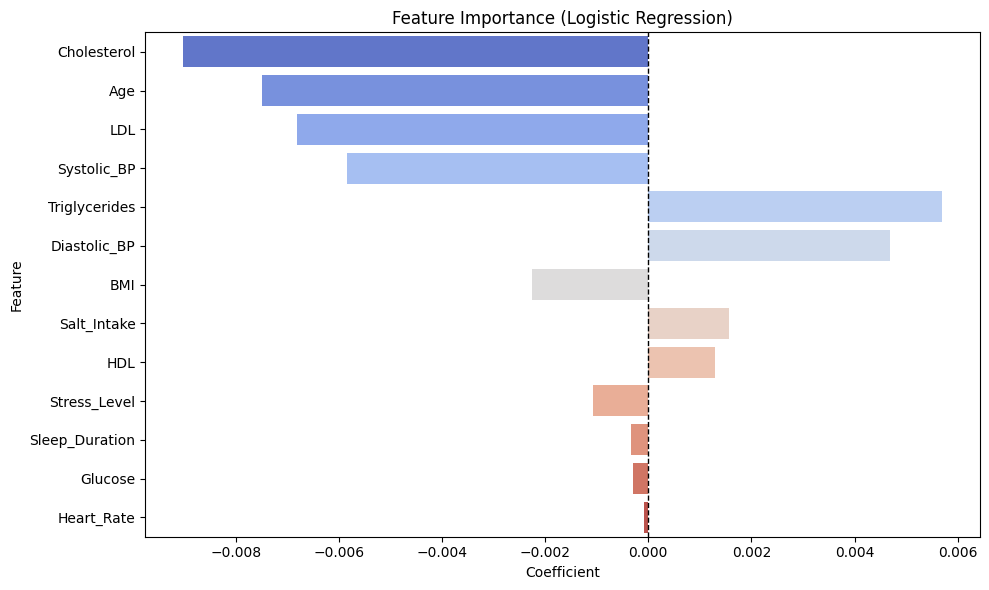

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- 1. Feature set & target ---
X = df[['Age', 'BMI', 'Cholesterol', 'Systolic_BP', 'Diastolic_BP',
        'Salt_Intake', 'Sleep_Duration', 'Heart_Rate', 'LDL', 'HDL',
        'Triglycerides', 'Glucose', 'Stress_Level']]

y = df['Hypertension']

# 2. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Train logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_scaled, y)

# 4. Extract coefficients
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

# 5. Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coeff_df, palette='coolwarm')
plt.title('Feature Importance (Logistic Regression)')
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()


Logistic Regression Feature Coefficients:
 Triglycerides     0.005697
Diastolic_BP      0.004681
Salt_Intake       0.001562
HDL               0.001297
Heart_Rate       -0.000081
Glucose          -0.000291
Sleep_Duration   -0.000327
Stress_Level     -0.001081
BMI              -0.002253
Systolic_BP      -0.005837
LDL              -0.006807
Age              -0.007492
Cholesterol      -0.009017
dtype: float64

Sorted by Importance (absolute values):
 Cholesterol       0.009017
Age               0.007492
LDL               0.006807
Systolic_BP       0.005837
Triglycerides     0.005697
Diastolic_BP      0.004681
BMI               0.002253
Salt_Intake       0.001562
HDL               0.001297
Stress_Level      0.001081
Sleep_Duration    0.000327
Glucose           0.000291
Heart_Rate        0.000081
dtype: float64


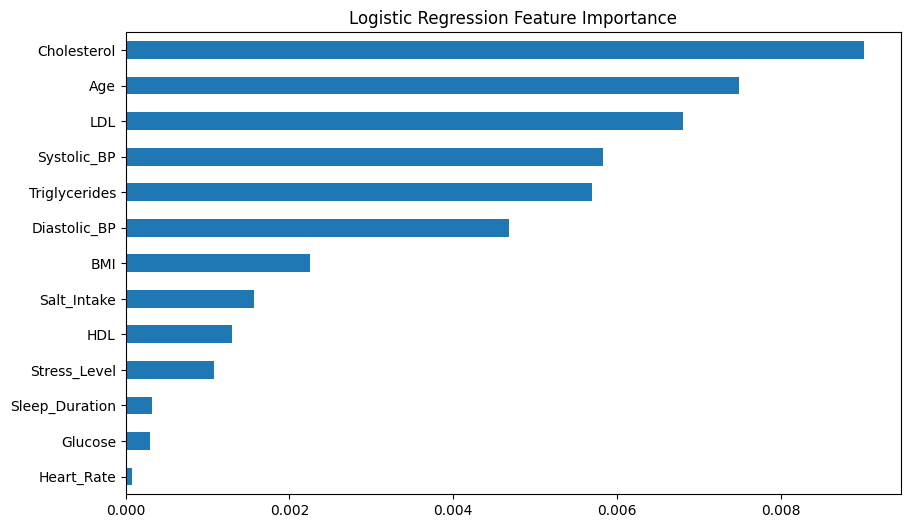

In [ ]:
import pandas as pd
import numpy as np

# Assuming lr_model is already trained
coefficients = logreg.coef_[0]  # For binary classification, it's a 1D array
feature_importance_lr = pd.Series(coefficients, index=X.columns)

# Sort by absolute value to see most influential features
feature_importance_lr_sorted = feature_importance_lr.abs().sort_values(ascending=False)

# Print all coefficients (signed) and sorted importance
print("Logistic Regression Feature Coefficients:\n", feature_importance_lr.sort_values(ascending=False))
print("\nSorted by Importance (absolute values):\n", feature_importance_lr_sorted)

# Optional: Plot
feature_importance_lr_sorted.plot(kind='barh', figsize=(10, 6))
plt.title("Logistic Regression Feature Importance")
plt.gca().invert_yaxis()
plt.show()


####Decision tree typa correlation checking(Not required)

<ipython-input-11-4f334810cc70>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importances, palette='viridis')


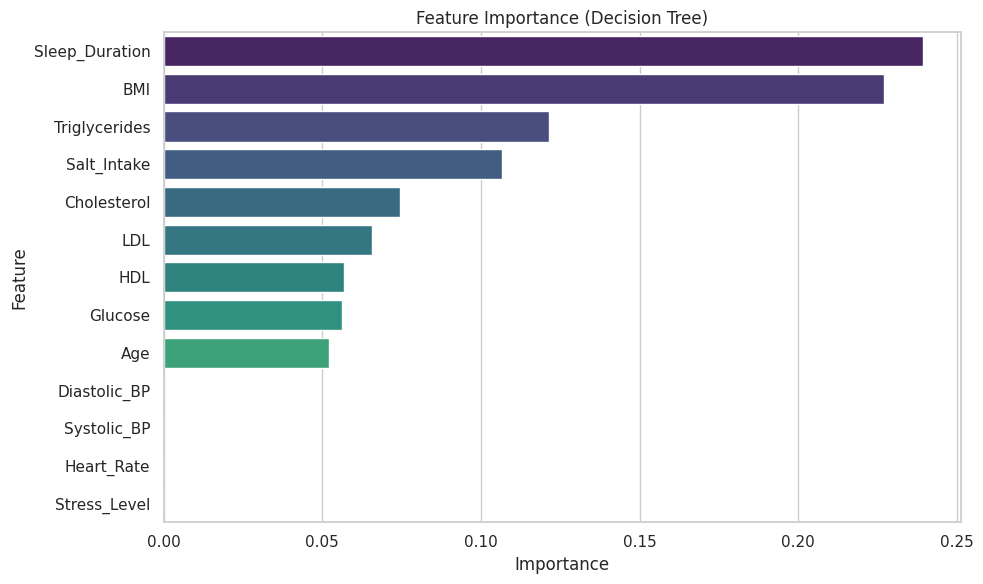

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---- 1. Split data ----
X = df[['Age', 'BMI', 'Cholesterol', 'Systolic_BP', 'Diastolic_BP',
        'Salt_Intake', 'Sleep_Duration', 'Heart_Rate', 'LDL', 'HDL',
        'Triglycerides', 'Glucose', 'Stress_Level']]
y = df['Hypertension']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---- 2. Fit Decision Tree ----
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)

# ---- 3. Get feature importance ----
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt.feature_importances_
}).sort_values(by='Importance', ascending=False)

# ---- 4. Plot ----
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances, palette='viridis')
plt.title('Feature Importance (Decision Tree)')
plt.tight_layout()
plt.show()


####Random forest algorithm for correlation checking

<ipython-input-2-7d16fb9d8e02>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importances, palette='viridis')


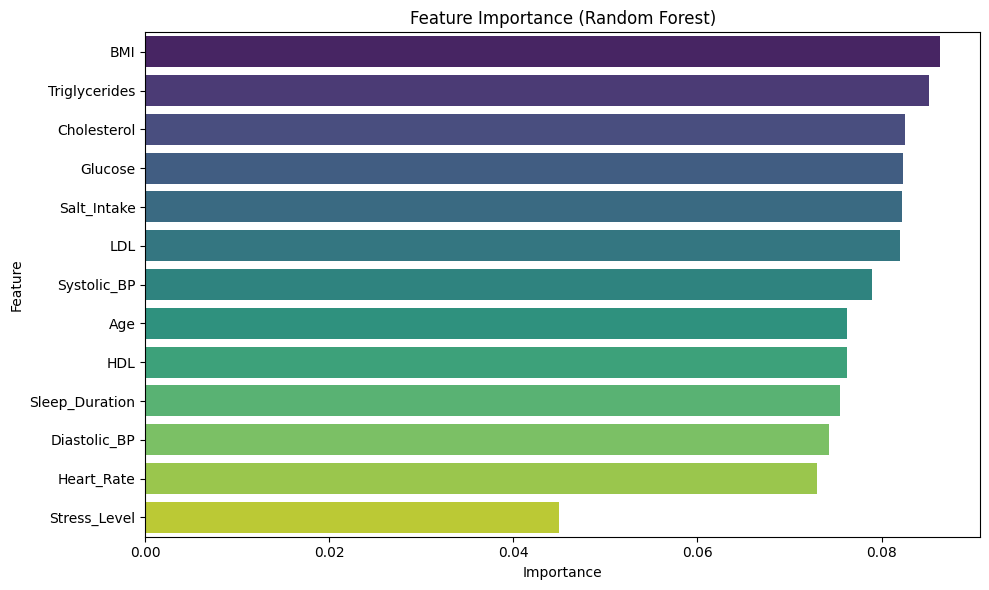

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define features and target
X = df[['Age', 'BMI', 'Cholesterol', 'Systolic_BP', 'Diastolic_BP',
        'Salt_Intake', 'Sleep_Duration', 'Heart_Rate', 'LDL', 'HDL',
        'Triglycerides', 'Glucose', 'Stress_Level']]
y = df['Hypertension']

# Split the data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Extract feature importances
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances, palette='viridis')
plt.title('Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()


Top Features from Random Forest:
 BMI               0.086382
Triglycerides     0.085171
Cholesterol       0.082505
Glucose           0.082325
Salt_Intake       0.082278
LDL               0.082028
Systolic_BP       0.078925
Age               0.076290
HDL               0.076290
Sleep_Duration    0.075496
Diastolic_BP      0.074325
Heart_Rate        0.072999
Stress_Level      0.044986
dtype: float64


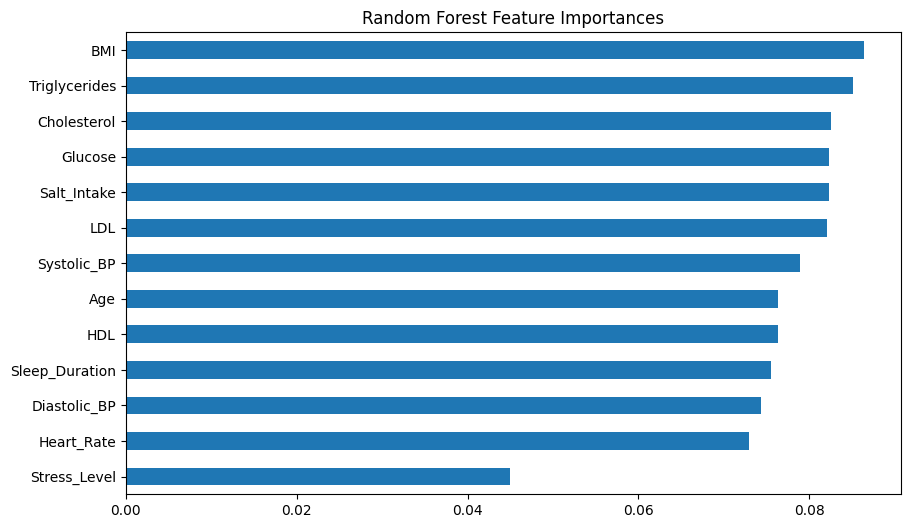

In [ ]:
# Get feature importances from the Random Forest model
import pandas as pd
import matplotlib.pyplot as plt

# Replace X.columns with the actual list of your feature names if needed
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)

# Sort and display the top features
top_features = feature_importances.sort_values(ascending=False)
print("Top Features from Random Forest:\n", top_features)

# Optional: Plot the feature importances
top_features.plot(kind='barh', figsize=(10, 6))
plt.title("Random Forest Feature Importances")
plt.gca().invert_yaxis()
plt.show()


####Linear svc

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


LinearSVC Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      9889
           1       0.72      1.00      0.84     25108

    accuracy                           0.72     34997
   macro avg       0.36      0.50      0.42     34997
weighted avg       0.51      0.72      0.60     34997

LinearSVC Feature Importances:
 Cholesterol       0.004014
LDL               0.003172
Age               0.002430
Triglycerides     0.001951
Systolic_BP       0.001908
Diastolic_BP      0.001840
HDL               0.001835
Glucose           0.001310
Stress_Level      0.000984
BMI               0.000803
Heart_Rate        0.000720
Sleep_Duration    0.000370
Salt_Intake       0.000246
dtype: float64


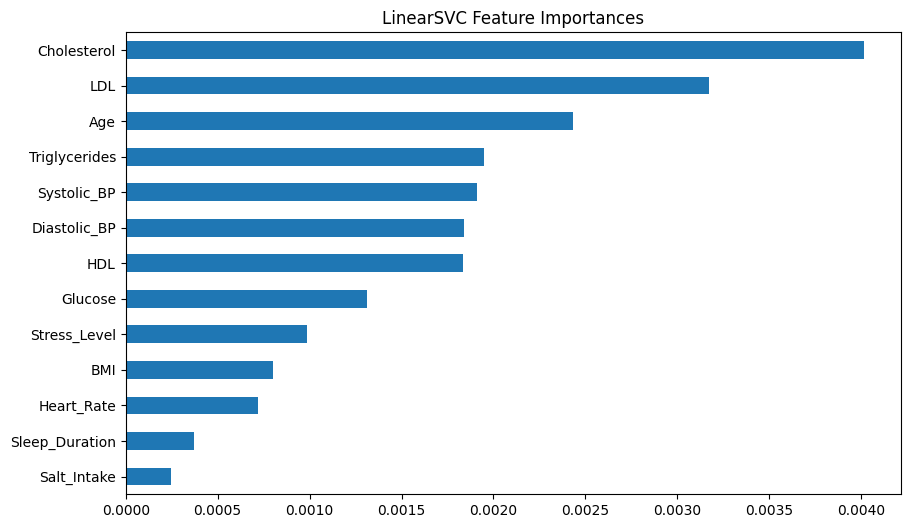

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt

# Define X and y
X = df[['Age', 'BMI', 'Cholesterol', 'Systolic_BP', 'Diastolic_BP',
        'Salt_Intake', 'Sleep_Duration', 'Heart_Rate', 'LDL', 'HDL',
        'Triglycerides', 'Glucose', 'Stress_Level']]
y = df['Hypertension']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train LinearSVC with standardization
svm_model = make_pipeline(StandardScaler(), LinearSVC(max_iter=10000))
svm_model.fit(X_train, y_train)

# Predict & Evaluate
svm_preds = svm_model.predict(X_test)
print("LinearSVC Classification Report:\n", classification_report(y_test, svm_preds))

# Feature Importance
svm_coef = svm_model.named_steps['linearsvc'].coef_[0]
svm_importance = pd.Series(svm_coef, index=X.columns).abs().sort_values(ascending=False)

print("LinearSVC Feature Importances:\n", svm_importance)

# Plot
svm_importance.plot(kind='barh', figsize=(10, 6))
plt.title("LinearSVC Feature Importances")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Balanced class weights to fix class imbalance
svm_model = make_pipeline(
    StandardScaler(),
    LinearSVC(class_weight='balanced', max_iter=10000)
)

svm_model.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(class_weight='balanced', max_iter=10000))])

In [ ]:
svm_preds = svm_model.predict(X_test)
print(classification_report(y_test, svm_preds))


              precision    recall  f1-score   support

           0       0.28      0.50      0.36      9889
           1       0.72      0.50      0.59     25108

    accuracy                           0.50     34997
   macro avg       0.50      0.50      0.48     34997
weighted avg       0.60      0.50      0.53     34997



####XGboost for correlation

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:48:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
<ipython-input-5-31fb6c796362>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importances, palette='plasma')


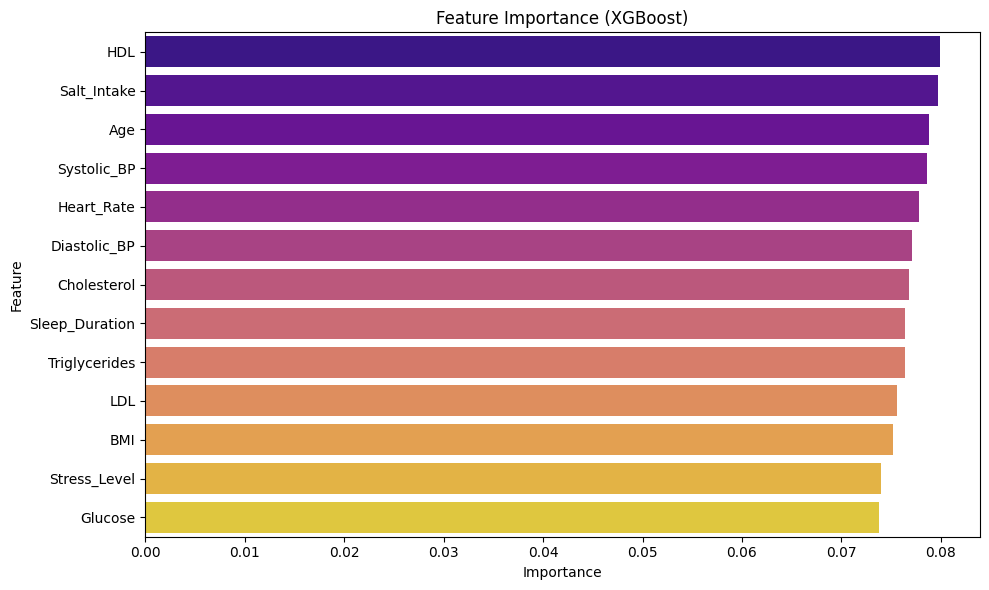

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define features and target
X = df[['Age', 'BMI', 'Cholesterol', 'Systolic_BP', 'Diastolic_BP',
        'Salt_Intake', 'Sleep_Duration', 'Heart_Rate', 'LDL', 'HDL',
        'Triglycerides', 'Glucose', 'Stress_Level']]
y = df['Hypertension']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Extract feature importances
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances, palette='plasma')
plt.title('Feature Importance (XGBoost)')
plt.tight_layout()
plt.show()


XGBoost Feature Importances:
 HDL               0.079937
Salt_Intake       0.079683
Age               0.078827
Systolic_BP       0.078592
Heart_Rate        0.077805
Diastolic_BP      0.077059
Cholesterol       0.076814
Sleep_Duration    0.076388
Triglycerides     0.076359
LDL               0.075627
BMI               0.075217
Stress_Level      0.073947
Glucose           0.073746
dtype: float32


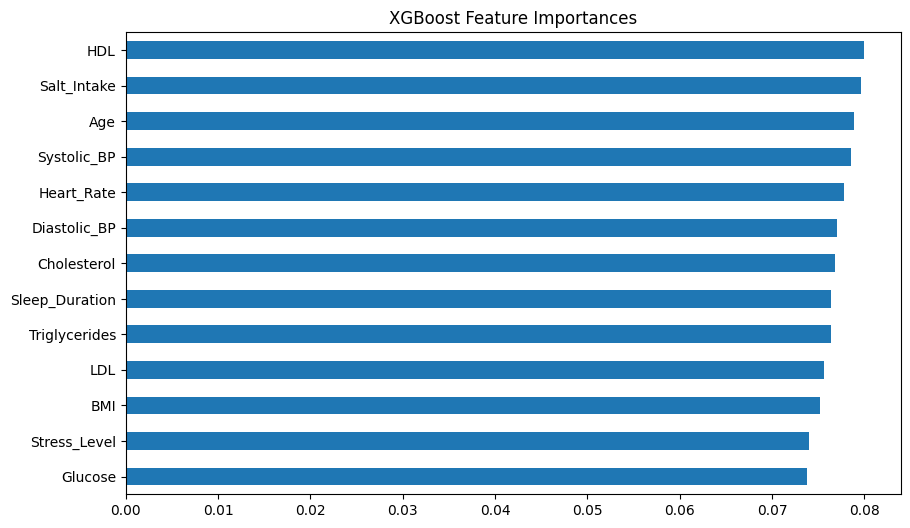

In [ ]:
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importance scores
xgb_importance = pd.Series(xgb_model.feature_importances_, index=X.columns)

# Sort them
xgb_sorted = xgb_importance.sort_values(ascending=False)
print("XGBoost Feature Importances:\n", xgb_sorted)

# Optional: Plot
xgb_sorted.plot(kind='barh', figsize=(10, 6))
plt.title("XGBoost Feature Importances")
plt.gca().invert_yaxis()
plt.show()


#####SHap for xgb

In [ ]:

!pip install shap


100%|===================| 34930/34997 [02:45<00:00]       

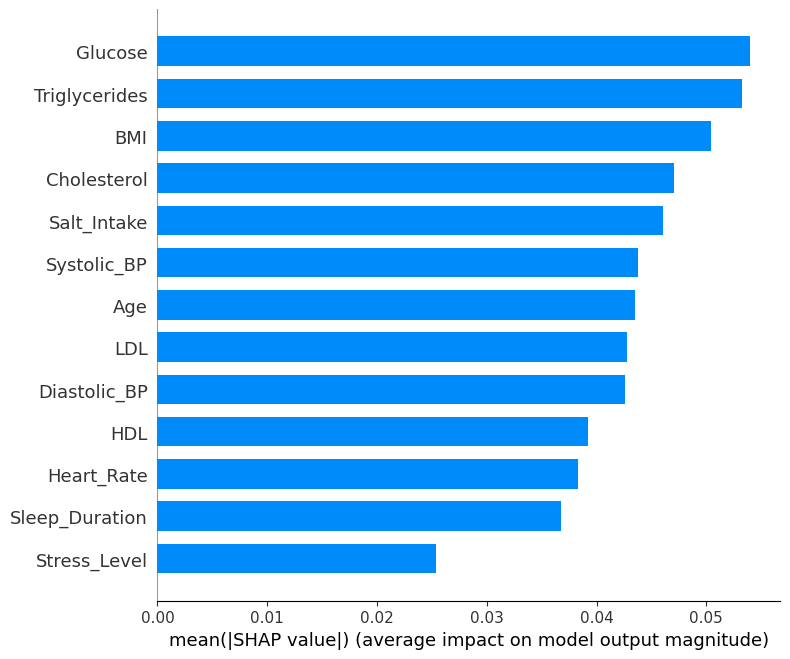

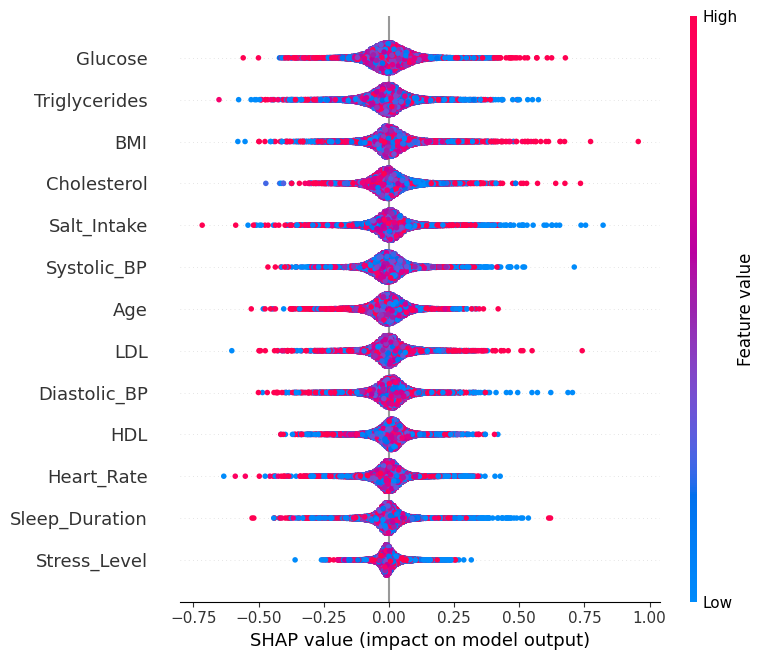

In [ ]:
import shap
import matplotlib.pyplot as plt

# Create SHAP explainer
explainer = shap.Explainer(xgb_model, X_train)

# Compute SHAP values
shap_values = explainer(X_test)

# Bar plot: Feature importance summary
shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)


###Conclusion(of feature importances)


#### bar plot(averaged importance of feature values from 4 models)


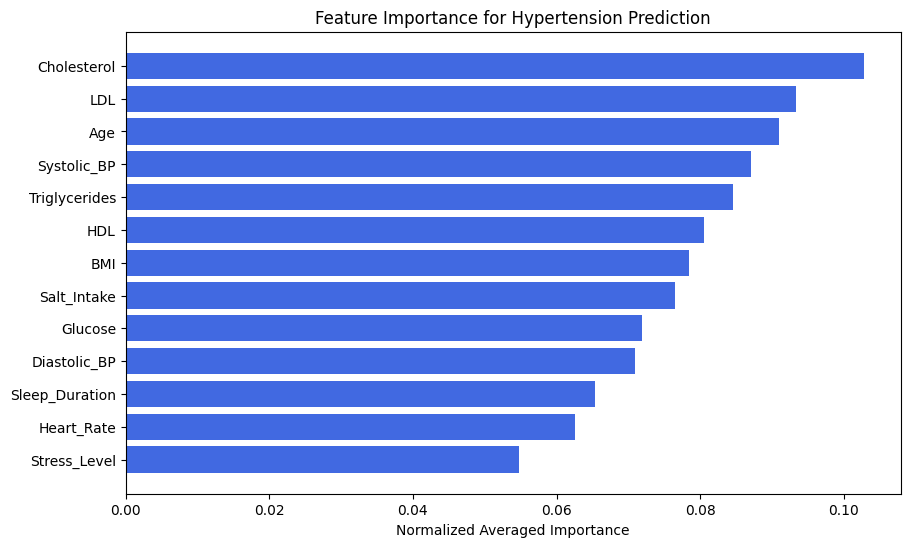

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Data: Averaged feature importances
features = ['Cholesterol', 'LDL', 'Age', 'Systolic_BP', 'Triglycerides', 'HDL', 'BMI', 'Salt_Intake',
            'Glucose', 'Diastolic_BP', 'Sleep_Duration', 'Heart_Rate', 'Stress_Level']
importances = [0.1028, 0.0934, 0.0910, 0.0871, 0.0846, 0.0805, 0.0784, 0.0765, 0.0719,
               0.0710, 0.0653, 0.0626, 0.0548]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='royalblue')
plt.xlabel('Normalized Averaged Importance')
plt.title('Feature Importance for Hypertension Prediction')
plt.gca().invert_yaxis()  # Top to bottom order
plt.show()


##2) classfy individuals as low/normal/high in hypertensive terms

In [ ]:
# Please note that this is not the code that is used in the streamlit app!

import numpy as np
import pandas as pd

# 1. Feature weights from averaged importances
weights = {
    'Age': 0.076,
    'BMI': 0.086,
    'Cholesterol': 0.082,
    'Systolic_BP': 0.078,
    'Diastolic_BP': 0.074,
    'Salt_Intake': 0.082,
    'Sleep_Duration': 0.075,
    'Stress_Level': 0.045,
    'Heart_Rate': 0.073,
    'Glucose': 0.082,
    'LDL': 0.082,
    'Triglycerides': 0.085,
    'HDL': 0.076
}

# 2. Normalize weights so they sum to 1
total_weight = sum(weights.values())
normalized_weights = {k: v / total_weight for k, v in weights.items()}

# 3. Calculate means and stds from your dataset df (make sure df is your full dataframe)
means = df[weights.keys()].mean().to_dict()
stds = df[weights.keys()].std().to_dict()

# 4. Standardize function
def standardize(value, mean, std):
    return (value - mean) / std if std != 0 else 0

# 5. Compute raw scores for the entire dataset to get min/max for scaling
def compute_raw_score(row):
    raw = 0
    for feat, weight in normalized_weights.items():
        z = standardize(row[feat], means[feat], stds[feat])
        raw += z * weight
    return raw

df['raw_score'] = df.apply(compute_raw_score, axis=1)
raw_min = df['raw_score'].min()
raw_max = df['raw_score'].max()

# 6. Main risk scoring function with mean imputation and scaled 0-100 output
def hypertension_risk_score(input_features):
    raw_score = 0
    for feature, weight in normalized_weights.items():
        # Impute missing features with mean
        value = input_features.get(feature, means[feature])
        z = standardize(value, means[feature], stds[feature])
        raw_score += z * weight

    # Scale raw score to 0–100 using dataset min and max raw scores
    scaled_score = ((raw_score - raw_min) / (raw_max - raw_min)) * 100
    return round(scaled_score, 2)

# 7. Optional: Get detailed feature contribution breakdown
def hypertension_risk_contributions(input_features):
    contributions = {}
    raw_score = 0
    for feature, weight in normalized_weights.items():
        value = input_features.get(feature, means[feature])
        z = standardize(value, means[feature], stds[feature])
        contrib = z * weight
        contributions[feature] = round(contrib, 4)
        raw_score += contrib
    scaled_score = ((raw_score - raw_min) / (raw_max - raw_min)) * 100
    return round(scaled_score, 2), contributions

# === Example usage ===
sample = {
    'Age': 20,
    'BMI': 17.9,
    'Cholesterol': 180,
    'Systolic_BP': 160,
    'Diastolic_BP': 55,
    'Salt_Intake': 4,
    'Sleep_Duration': 7,
    'Stress_Level': 4,
    'Heart_Rate': 68,
    'Glucose': 90,
    'LDL': 120,
    'Triglycerides': 150,
    'HDL': 45
}

score = hypertension_risk_score(sample)
print(f"Hypertension Risk Score: {score}/100")

score, contribs = hypertension_risk_contributions(sample)
print(f"Risk Score: {score}/100")
print("Feature contributions:")
for f, c in contribs.items():
    print(f"  {f}: {c}")


Hypertension Risk Score: 16.46/100
Risk Score: 16.46/100
Feature contributions:
  Age: -0.123
  BMI: -0.1148
  Cholesterol: -0.0846
  Systolic_BP: 0.0767
  Diastolic_BP: -0.1479
  Salt_Intake: -0.0984
  Sleep_Duration: 0.0002
  Stress_Level: -0.0177
  Heart_Rate: -0.033
  Glucose: -0.0976
  LDL: -0.0226
  Triglycerides: 0.0006
  HDL: -0.074
